In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import gensim 
from nltk.tokenize import word_tokenize
from sklearn.decomposition import TruncatedSVD
from matplotlib.pyplot import figure
from matplotlib.figure import Figure
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)
import re
from stop_words import get_stop_words
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sb
import random

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

#preprocessing
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

# for named entity recognition (NER)
from nltk import ne_chunk

In [3]:
data = pd.read_csv('Emails.csv', header=0)

In [4]:
data.columns

Index(['Id', 'DocNumber', 'MetadataSubject', 'MetadataTo', 'MetadataFrom',
       'SenderPersonId', 'MetadataDateSent', 'MetadataDateReleased',
       'MetadataPdfLink', 'MetadataCaseNumber', 'MetadataDocumentClass',
       'ExtractedSubject', 'ExtractedTo', 'ExtractedFrom', 'ExtractedCc',
       'ExtractedDateSent', 'ExtractedCaseNumber', 'ExtractedDocNumber',
       'ExtractedDateReleased', 'ExtractedReleaseInPartOrFull',
       'ExtractedBodyText', 'RawText'],
      dtype='object')

In [5]:
timeStamp_split = data['MetadataDateSent'].str.split("T")
Times = timeStamp_split.str[1]

data['Dates'] = timeStamp_split.str[0]
data['Times'] = Times.str.split("+").str[0]

data['Dates'] = pd.Series(data['Dates'])
data['Times'] = pd.Series(data['Times'])

data = data[["MetadataSubject", "ExtractedBodyText", "MetadataTo", "MetadataFrom","Times","Dates"]]
data.head(5)

MetadataSubject  \
0                                                WOW   
1  H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...   
2                                      CHRIS STEVENS   
3                         CAIRO CONDEMNATION - FINAL   
4  H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...   

                                   ExtractedBodyText    MetadataTo  \
0                                                NaN             H   
1  B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...             H   
2                                                Thx            ;H   
3                                                NaN             H   
4  H <hrod17@clintonemail.com>\nFriday, March 11,...  Abedin, Huma   

        MetadataFrom     Times       Dates  
0  Sullivan, Jacob J  04:00:00  2012-09-12  
1                NaN  05:00:00  2011-03-03  
2    Mills, Cheryl D  04:00:00  2012-09-12  
3    Mills, Cheryl D  04:00:00  2012-09-12  
4                  H  05:00:00  2011-03-11

In [6]:
text_data  = data[pd.notnull(data['ExtractedBodyText'])]
print(data.head(5)['ExtractedBodyText'])

0                                                  NaN
1    B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...
2                                                  Thx
3                                                  NaN
4    H <hrod17@clintonemail.com>\nFriday, March 11,...
Name: ExtractedBodyText, dtype: object


In [7]:
# words that are meaningless in the context of emails
# remove them so that the 

custom_stop_words = ["ok", "like", "just", "pls", "pis", "yes", "know", "let", "fw", "sure", "thanks",
                     "no", "sent", "thx", "good", "agree", "fyi", "still", "great", "print", "pm", "state",
                    "well", "much", "think", "going", "say", "thank", "best", "gov", "state gov", "tomorrow",
                    "says", "even", "may", "want", "hope", "see", "talk", "today", "cdm", "email", "office",
                    "discuss", "need", "work", "send", "time", "com", "sorry", "forward", "forwarded", "said",
                    "sunday", "friday", "saturday", "monday", "tuesday", "wednesday", "thursday", "morning",
                    "message", "copy", "july", "september", "january", "february", "march", "april", "may", "june",
                    "august", "october", "november", "december", "thur", "thurs", "morning", "asked", "called",
                    "might", "week", "yeah", "soo", "oh", "ask", "aka", "love", "gotta", "dc", "fe", "mail",
                    "received", "wh", "et", "al", "ny", "ap", "btw", "asking", "us", "go"]

In [8]:
stop_words = get_stop_words('en') + custom_stop_words + stopwords.words('english')

In [9]:
# cleaning the texts

text_data["ExtractedBodyText"] = text_data.ExtractedBodyText.apply(lambda x : str.lower(x))#tolower
text_data["ExtractedBodyText"] = text_data["ExtractedBodyText"].apply(lambda x : " ".join(re.findall('[\w]+',x)))#remove punctuation
text_data["ExtractedBodyText"] = text_data["ExtractedBodyText"].str.replace('\d+', '') # remove numbers

<ipython-input-9-170cfb939d1d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-9-170cfb939d1d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [11]:
text_data["ExtractedBodyText"]

1       b thursday march     pm h latest how syria is ...
2                                                     thx
4       h hrod clintonemail com friday march     pm hu...
5       pis print h hrod clintonernailcom wednesday se...
7       h hrod clintonemail corn friday march     pm h...
                              ...                        
7938    hi sorry i haven t had a chance to see you but...
7939    b i assume you saw this by now if not it s wor...
7941    big change of plans in the senate senator reid...
7943    pverveer b friday december     am from b pleas...
7944                                            see below
Name: ExtractedBodyText, Length: 6742, dtype: object

In [12]:
def remove_stopWords(s):
    '''For removing stop words
    '''
    s = ' '.join(word for word in s.split() if word not in stop_words)
    return s

text_data["ExtractedBodyText"]= text_data["ExtractedBodyText"].apply(lambda x: remove_stopWords(x)) # remove stopwords

print(text_data["ExtractedBodyText"])

1       b h latest syria aiding qaddafi sid hrc memo s...
2                                                        
4       h hrod clintonemail huma abedin h latest syria...
5       h hrod clintonernailcom russorv meet right win...
7       h hrod clintonemail corn huma abedin h latest ...
                              ...                        
7938    hi chance hear directly result cancun way beyo...
7939                              b assume saw worth read
7941    big change plans senate senator reid announced...
7943    pverveer b b please help department happy plea...
7944                                                     
Name: ExtractedBodyText, Length: 6742, dtype: object


<ipython-input-12-7175be000723>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



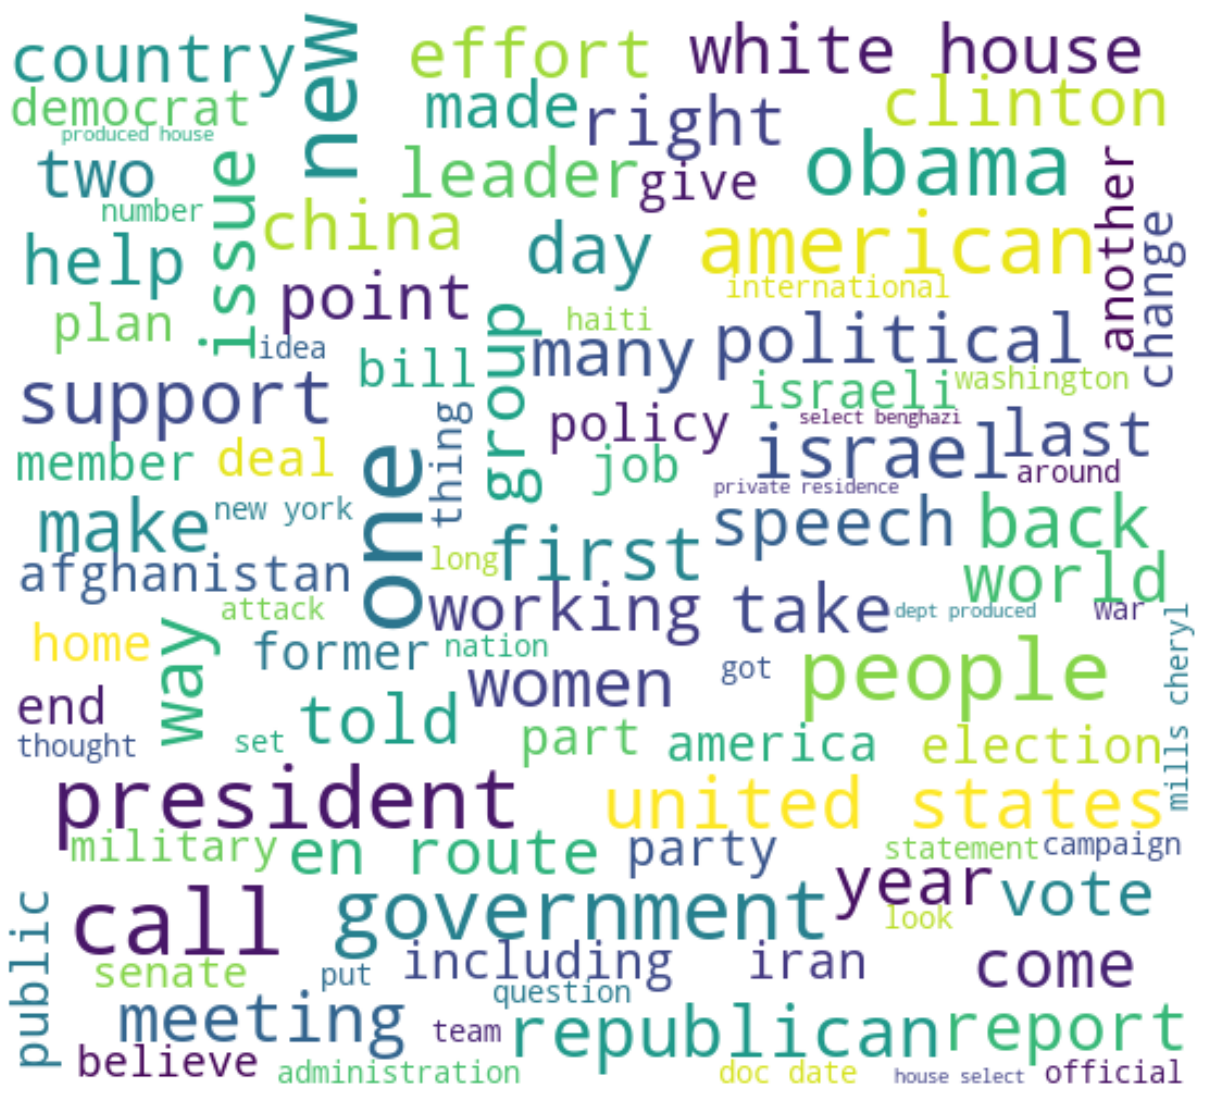

In [13]:
wordcloud2 = WordCloud(width = 550, height = 500, max_font_size=50, max_words=100, background_color="white").generate(' '.join(text_data["ExtractedBodyText"]))# Generate plot
plt.figure(figsize=(40,20))
plt.imshow(wordcloud2,interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
vect = TfidfVectorizer(stop_words='english', max_df=0.50, min_df=2,ngram_range=(1,2))
X = vect.fit_transform(text_data.ExtractedBodyText)

In [15]:
X_dense = X.todense()
pca = PCA(n_components = 30)
coords = pca.fit_transform(X_dense)

In [35]:
trace1 = go.Scatter3d(
    x=coords[:, 0],
    y=coords[:, 1],
    z=coords[:, 2],
    mode='markers',
    marker=dict(
        size=12,
        opacity=0.8
    )
)

plt_data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=plt_data, layout=layout)
plotly.offline.iplot(fig)

In [17]:
def top_tfidf_feats(row, features, top_n=20):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats, columns=['features', 'score'])
    return df

def top_feats_in_doc(X, features, row_id, top_n=25):
    row = np.squeeze(X[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

In [18]:
features = vect.get_feature_names()
top_feats_in_doc(X, features, 1, 10)

features  score
0               zurich    0.0
1       foreign policy    0.0
2  foreign governments    0.0
3   foreign investment    0.0
4    foreign investors    0.0
5       foreign leader    0.0
6      foreign leaders    0.0
7        foreign media    0.0
8     foreign minister    0.0
9    foreign ministers    0.0

In [19]:
def top_mean_feats(X, features, grp_ids=None, min_tfidf=0.1, top_n=25):
    if grp_ids:
        D = X[grp_ids].toarray()
    else:
        D = X.toarray()
        D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

In [36]:
#top_mean_feats(X, features, top_n=30)

In [21]:
n_clusters = 50
clf = KMeans(n_clusters=n_clusters, max_iter=10000, init='k-means++', n_init=1)
labels = clf.fit_predict(X)
#print(labels)

X_dense = X.todense()
coords = PCA(n_components=100).fit_transform(X_dense)

trace1 = go.Scatter3d(
    x=coords[:, 0],
    y=coords[:, 1],
    z=coords[:, 2],
    mode='markers',
    marker=dict(
        size=12,
        opacity=0.8,
        color = labels
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

In [22]:
def top_feats_per_cluster(X, y, features, min_tfidf=0.1, top_n=25):
    dfs = []
    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label) 
        feats_df = top_mean_feats(X, features, ids,  min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

In [23]:
for i in top_feats_per_cluster(X, labels, features, min_tfidf=0.1, top_n=10):
    print(i)
    print("")

         features     score
0      abstention  0.484532
1            vote  0.299412
2   required vote  0.257346
3      iaea board  0.257346
4  esther brimmer  0.248853
5        presumed  0.248853
6         brimmer  0.242266
7           amano  0.236884
8            iaea  0.221804
9          esther  0.218991

    features     score
0       huma  0.008564
1  secretary  0.005791
2        got  0.005592
3     abedin  0.005480
4        new  0.005454
5       make  0.005393
6       jake  0.005370
7    meeting  0.005290
8       lona  0.005011
9    working  0.005004

        features     score
0  enjoy weekend  0.208804
1       catching  0.185311
2         visits  0.173682
3            sad  0.165888
4       meantime  0.165888
5        andrews  0.164593
6    institution  0.155305
7             hi  0.154465
8      wonderful  0.153653
9          enjoy  0.151370

     features     score
0   secretary  0.237629
1        room  0.159444
2          en  0.144911
3      arrive  0.143706
4    en route  0.14

In [24]:
#Preprocessing
small_count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
X2 = small_count_vectorizer.fit_transform(text_data.ExtractedBodyText)
n_topics = 50

In [25]:
lsa_model = TruncatedSVD(n_components= n_topics, n_iter =350)

In [26]:
# Define helper functions
def get_keys(topic_matrix):
    '''returns an integer list of predicted topic categories for a given topic matrix'''
    keys = []
    for i in range(topic_matrix.shape[0]):
        keys.append(topic_matrix[i].argmax())
    return keys

def keys_to_counts(keys):
    '''returns a tuple of topic categories and their accompanying magnitudes for a given list of keys'''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [27]:
lsa_topic_matrix = lsa_model.fit_transform(X2)

In [28]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)
print(lsa_keys)

[48, 8, 48, 1, 48, 7, 48, 26, 48, 15, 0, 0, 1, 34, 48, 6, 48, 48, 48, 20, 48, 22, 29, 25, 35, 0, 48, 30, 48, 0, 1, 48, 1, 0, 1, 38, 38, 39, 49, 40, 48, 0, 7, 47, 10, 25, 1, 0, 6, 1, 0, 0, 0, 0, 5, 0, 1, 48, 48, 0, 6, 0, 0, 0, 44, 0, 0, 0, 48, 14, 0, 36, 1, 0, 12, 1, 1, 6, 0, 34, 1, 49, 37, 0, 0, 10, 0, 1, 44, 34, 0, 0, 34, 0, 1, 39, 33, 20, 0, 44, 48, 12, 5, 5, 48, 0, 27, 48, 1, 0, 1, 0, 6, 0, 37, 1, 6, 13, 12, 0, 0, 41, 44, 0, 1, 6, 48, 11, 0, 0, 11, 6, 0, 0, 0, 48, 0, 32, 6, 0, 11, 48, 1, 0, 0, 48, 1, 0, 1, 0, 0, 1, 6, 0, 36, 47, 48, 1, 0, 5, 0, 0, 48, 0, 48, 0, 0, 48, 48, 48, 0, 0, 33, 0, 2, 1, 39, 13, 0, 0, 1, 0, 0, 48, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 48, 1, 0, 1, 10, 1, 0, 48, 0, 1, 10, 1, 0, 0, 7, 28, 0, 1, 48, 1, 35, 0, 1, 48, 0, 0, 0, 0, 48, 0, 47, 1, 48, 48, 0, 48, 1, 0, 6, 0, 0, 0, 48, 48, 0, 0, 0, 1, 6, 44, 48, 6, 0, 47, 1, 31, 1, 33, 0, 0, 6, 1, 1, 0, 34, 1, 1, 32, 17, 35, 4, 49, 0, 0, 12, 22, 41, 0, 0, 47, 36, 0, 48, 6, 30, 48, 44, 14, 0, 0, 0, 10, 34, 0, 42, 0, 35, 43, 3

In [29]:
# Define helper functions
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''returns a list of n_topic strings, where each string contains the n most common 
        words in a predicted category, in order'''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [30]:
top_n_words_lsa = get_top_n_words(10, lsa_keys, X2, small_count_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i), top_n_words_lsa[i])

Topic 0:  obama president new people house government clinton american secretary foreign
Topic 1:  department subject date case benghazi house doc information sensitive agreement
Topic 2:  senate vote senators republican republicans senator democrats reform house care
Topic 3:  koch david kochs charles million company political obama dollars tea
Topic 4:  mcchrystal afghanistan general war president obama military troops year commander
Topic 5:  right copies obama checking faxed betsy ebeling sitting clintonemail party
Topic 6:  clinton wjc branch hrc hillary gore secretary president special thought
Topic 7:  percent na favorable unfavorable obama vote vol dk heard disapprove
Topic 8:  wjc mention thought early tried cell brazil went hour refuel
Topic 9:  women people settlements haitian government help security afghanistan plan including
Topic 10:  secretary meeting room arrive en route depart department private residence
Topic 11:  diplomacy real lessons chris ambassador expeditionar

In [31]:
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''returns a list of centroid vectors from each predicted topic category'''
    mean_topic_vectors = []
    for t in range(n_topics):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])    
        
        articles_in_that_topic = np.vstack(articles_in_that_topic)
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_article_in_that_topic)
    return mean_topic_vectors

In [32]:
from sklearn.manifold import TSNE

tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=1500, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 6742 samples in 0.066s...
[t-SNE] Computed neighbors for 6742 samples in 3.002s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6742
[t-SNE] Computed conditional probabilities for sample 2000 / 6742
[t-SNE] Computed conditional probabilities for sample 3000 / 6742
[t-SNE] Computed conditional probabilities for sample 4000 / 6742
[t-SNE] Computed conditional probabilities for sample 5000 / 6742
[t-SNE] Computed conditional probabilities for sample 6000 / 6742
[t-SNE] Computed conditional probabilities for sample 6742 / 6742
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.503403
[t-SNE] KL divergence after 1500 iterations: 1.513806


Loading BokehJS ...

In [33]:
## create colormap
def rand_Hexcode(n):
    for i in range(n):
        r = lambda: random.randint(0,255)
        hcode =  '#%02X%02X%02X' % (r(),r(),r())
        yield hcode
        
colormap = np.fromiter(rand_Hexcode(n_topics), dtype='U25', count=n_topics)

In [34]:
top_3_words_lsa = get_top_n_words(3, lsa_keys, X2, small_count_vectorizer)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

trace1 = go.Scattergl(
        x=np.array(tsne_lsa_vectors[:,0]),
        y=np.array(tsne_lsa_vectors[:,1]),
        mode='markers',
        marker=dict(
            size=5,
             color = colormap[lsa_keys]
        )
    )
for t in range(n_topics):
    trace2 = go.Scatter(
        x=np.array(list(zip(*lsa_mean_topic_vectors))[0]),
        y=np.array(list(zip(*lsa_mean_topic_vectors))[1]),
        mode='markers+text',
        text = np.array(top_3_words_lsa[0:n_topics]),
         textfont=dict(
        family='sans serif',
        size=15,
        color=colormap[0:n_topics]
        ))
    
type(lsa_mean_topic_vectors) 
[item[0] for item in lsa_mean_topic_vectors]
data = [trace1,trace2]

layout = go.Layout(#title="t-SNE Clustering of {} LSA Topics".format(n_topics),
    width=2000,
    height=1000,
   margin=dict(
           l=0,
           r=0,
           b=0,
           t=0
       
        )
    )
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)